In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [3]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [4]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [7]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
cnn.fit(X_train, y_train, epochs=30)

Epoch 1/30
1563/1563 [==============================] - 12s 7ms/step - loss: 1.4562 - accuracy: 0.4747
Epoch 2/30
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0953 - accuracy: 0.6166
Epoch 3/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9660 - accuracy: 0.6640
Epoch 4/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8830 - accuracy: 0.6936
Epoch 5/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8159 - accuracy: 0.7161
Epoch 6/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7596 - accuracy: 0.7354
Epoch 7/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7140 - accuracy: 0.7503
Epoch 8/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6726 - accuracy: 0.7665
Epoch 9/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6357 - accuracy: 0.7789
Epoch 10/30
1563/1563 [==============================] - 12s 8ms/step - l

In [9]:
cnn.save('Image_classify.keras')

In [11]:
y_pred_probabilities = cnn.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

313/313 [==============================] - 1s 2ms/step


In [12]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=classes))

Classification Report:
              precision    recall  f1-score   support

    airplane       0.70      0.70      0.70      1000
  automobile       0.74      0.83      0.79      1000
        bird       0.58      0.58      0.58      1000
         cat       0.48      0.47      0.48      1000
        deer       0.62      0.62      0.62      1000
         dog       0.56      0.59      0.57      1000
        frog       0.75      0.75      0.75      1000
       horse       0.71      0.73      0.72      1000
        ship       0.82      0.75      0.78      1000
       truck       0.79      0.71      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



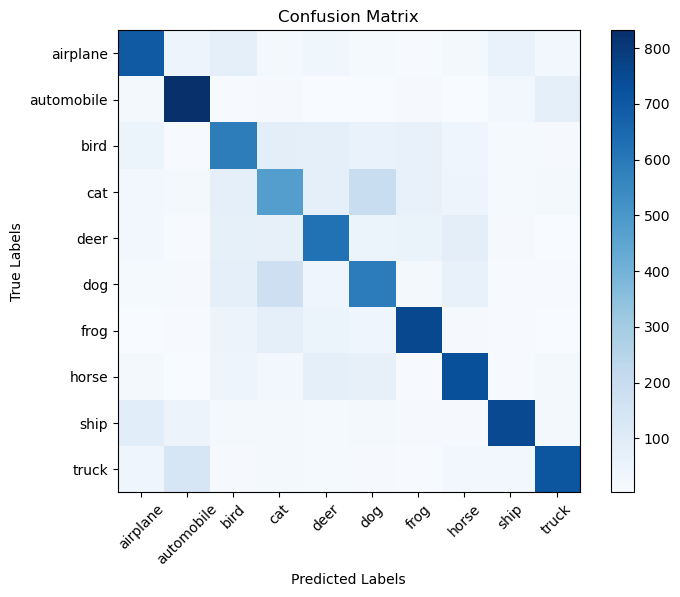

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=np.arange(10), labels=classes, rotation=45)
plt.yticks(ticks=np.arange(10), labels=classes)
plt.show()